In [20]:
from sklearn.datasets import load_boston
boston = load_boston()
print( "Type of boston dataset:", type(boston))


Type of boston dataset: <class 'sklearn.utils.Bunch'>


In [21]:
#Afficher les clés des features
print(boston.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [22]:
#DESCR: afficher la description complète des données
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [23]:
# chargement des données en utilisant Panda  Dataframe 
# et affichage des premières données
import pandas as pd
boston_df = pd.DataFrame(boston['data'] )
boston_df.head()

0     1     2    3      4   ...   8      9     10      11    12
0  0.00632  18.0  2.31  0.0  0.538  ...  1.0  296.0  15.3  396.90  4.98
1  0.02731   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  396.90  9.14
2  0.02729   0.0  7.07  0.0  0.469  ...  2.0  242.0  17.8  392.83  4.03
3  0.03237   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  394.63  2.94
4  0.06905   0.0  2.18  0.0  0.458  ...  3.0  222.0  18.7  396.90  5.33

[5 rows x 13 columns]

In [24]:
#Ajout des noms des colonnes
boston_df.columns = boston['feature_names']
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]

In [25]:
#Ajout de l'étiquette PRICE. 
boston_df['PRICE']= boston['target']
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]

In [26]:
import numpy as np
#Vérification des données manquantes
print(np.sum(np.isnan(boston_df)))

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


In [27]:

from sklearn.model_selection  import train_test_split
#y est le label.
y = boston_df['PRICE']
#X est la liste des features  .
X = boston_df.iloc[:,0:13]

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(354, 13) (152, 13) (354,) (152,)


In [28]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit( X_train, y_train )


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print('labels\n',X.columns)
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)
print('R2 for Train', lm.score( X_train, y_train ))
print('R2 for Test ', lm.score(X_test, y_test))

labels
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Coefficients: 
 [-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]
Intercept: 
 37.937107741833294
R2 for Train 0.7645451026942549
R2 for Test  0.6733825506400183


In [30]:
#Alternately, we can show the results in a dataframe using the zip command.
pd.DataFrame( list(zip(X.columns, lm.coef_)),
            columns=['features', 'estimatedCoeffs'])

features  estimatedCoeffs
0      CRIM        -0.121310
1        ZN         0.044466
2     INDUS         0.011342
3      CHAS         2.511246
4       NOX       -16.231253
5        RM         3.859068
6       AGE        -0.009985
7       DIS        -1.500270
8       RAD         0.242143
9       TAX        -0.011072
10  PTRATIO        -1.017753
11        B         0.006814
12    LSTAT        -0.486738

## Cross Validation et Hyperparameter Tuning
 

In [31]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm, X_train, y_train, cv=8) 
print("R2:", scores, "\n R2_avg: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))



R2: [0.69809776 0.6848557  0.61677678 0.74414545 0.75431003 0.62128711
 0.84406153 0.78197333] 
 R2_avg: 0.72 (+/- 0.07)





## Prediction

In [32]:
boston_df['PRICE_REG']=lm.predict(boston_df.iloc[:,0:13])
boston_df[['PRICE', 'PRICE_REG']].head()

PRICE  PRICE_REG
0   24.0  30.290795
1   21.6  24.885615
2   34.7  30.471178
3   33.4  28.472236
4   36.2  27.811077

## Graphique


Text(0.5, 1.0, 'Real vs Predicted Housing Prices')

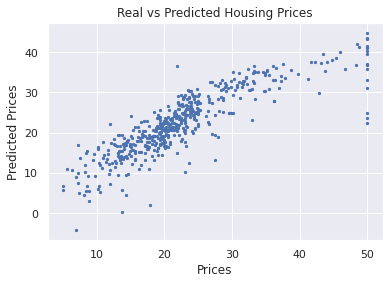

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter( boston_df['PRICE'], boston_df['PRICE_REG'], s=5 )
plt.xlabel( "Prices")
plt.ylabel( "Predicted Prices")
plt.title( "Real vs Predicted Housing Prices")

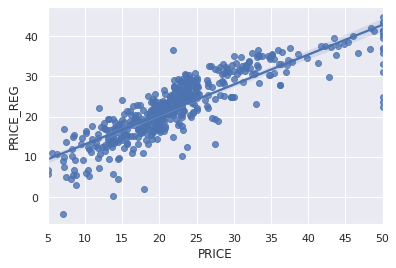

In [34]:
#Les données vs le modèle de regression
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="PRICE", y="PRICE_REG", data=boston_df[['PRICE','PRICE_REG']])

## L'analyse des résidus

Text(0, 0.5, 'Résidus')

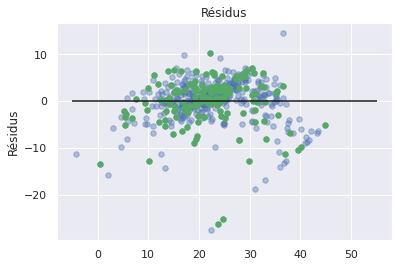

In [35]:

plt.scatter( lm.predict(X_train), lm.predict(X_train) - y_train,
           c ='b', s=30, alpha=0.4 )
plt.scatter( lm.predict(X_test), lm.predict(X_test) - y_test,
           c ='g', s=30 )
plt.hlines( y=0, xmin=-5, xmax=55)
plt.title( "Résidus" )
plt.ylabel( "Résidus" )

## Sauvegarde du modèle



In [36]:
#save the data
boston_df.to_csv('boston.csv')

In [37]:
import pickle
pickle.dump( lm, open( 'lm_reg_boston.p', 'wb' ) )

In [38]:
#Chargement du modèle
lm_pickled = pickle.load( open( "lm_reg_boston.p", "rb" ) )

lm_pickled.score(X_train, y_train)

0.7645451026942549